In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from PIL import Image
import os

# Path to dataset directories
train_dir = r'C:\Users\sarth\Downloads\Breast-Cancer-Classification-master\Breast-Cancer-Classification-master\DataSet\train'
val_dir = r'C:\Users\sarth\Downloads\Breast-Cancer-Classification-master\Breast-Cancer-Classification-master\DataSet\val'
test_dir = r'C:\Users\sarth\Downloads\Breast-Cancer-Classification-master\Breast-Cancer-Classification-master\DataSet\test'

# Image Data Generator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the train, validation, and test sets
train = datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=32)
val = datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary', batch_size=32)
test = datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary', batch_size=32, shuffle=False)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # To prevent overfitting
    Dense(1, activation='sigmoid')  # Output for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train, validation_data=val, epochs=5, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the trained model
model.save('breast_cancer_model.h5')


Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


c:\Users\sarth\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sarth\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6501 - loss: 0.6747 - val_accuracy: 0.6698 - val_loss: 0.6315
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 101s 840ms/step - accuracy: 0.6619 - loss: 0.6402 - val_accuracy: 0.6698 - val_loss: 0.6176
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 104s 870ms/step - accuracy: 0.6679 - loss: 0.6102 - val_accuracy: 0.6992 - val_loss: 0.6007
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 102s 845ms/step - accuracy: 0.7238 - loss: 0.5442 - val_accuracy: 0.7191 - val_loss: 0.5617
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 97s 807ms/step - accuracy: 0.7745 - loss: 0.4588 - val_accuracy: 0.7615 - val_loss: 0.5022
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 376ms/step - accuracy: 0.6085 - loss: 0.7430


Test Accuracy: 0.7642


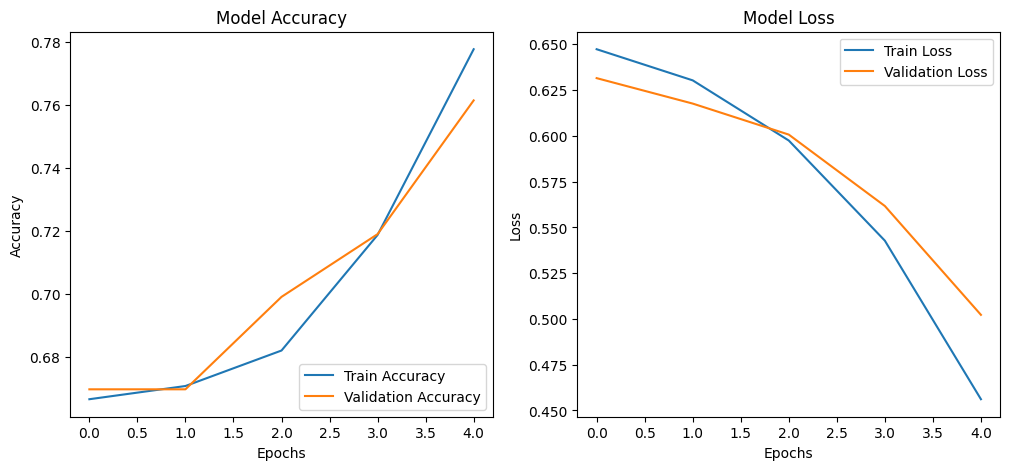

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


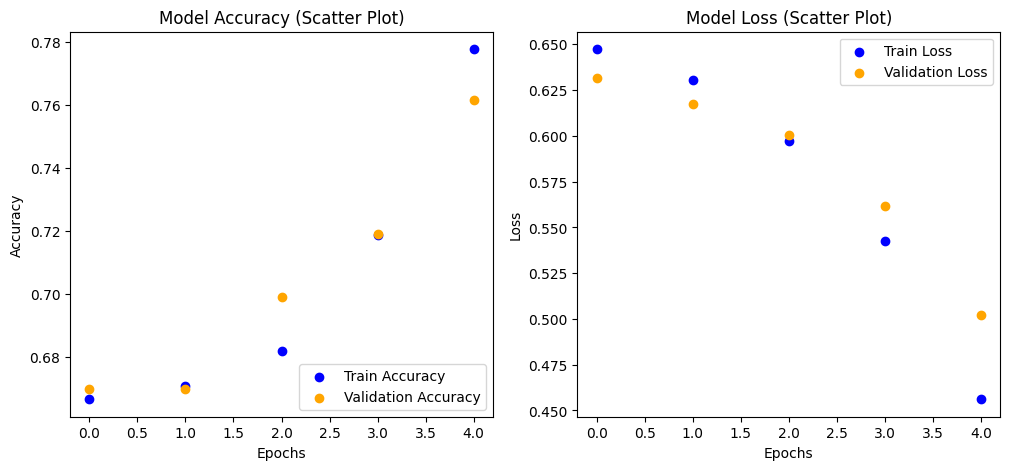

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy scatter
plt.figure(figsize=(12, 5))

# Accuracy scatter plot
plt.subplot(1, 2, 1)
plt.scatter(range(len(history.history['accuracy'])), history.history['accuracy'], label='Train Accuracy', color='blue')
plt.scatter(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy (Scatter Plot)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss scatter plot
plt.subplot(1, 2, 2)
plt.scatter(range(len(history.history['loss'])), history.history['loss'], label='Train Loss', color='blue')
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss (Scatter Plot)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


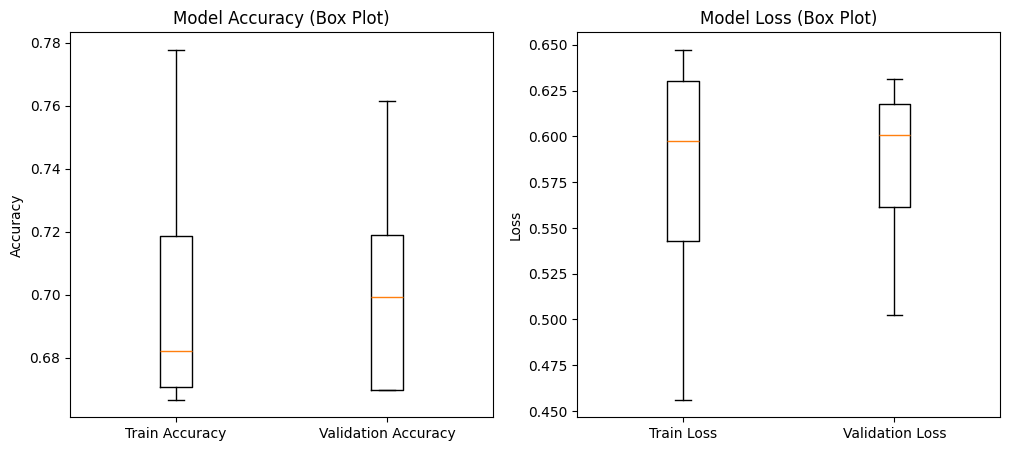

In [11]:
import matplotlib.pyplot as plt

# Prepare data for box plots
accuracy_data = [history.history['accuracy'], history.history['val_accuracy']]
loss_data = [history.history['loss'], history.history['val_loss']]

# Plot box plots for accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy box plot
plt.subplot(1, 2, 1)
plt.boxplot(accuracy_data, labels=['Train Accuracy', 'Validation Accuracy'])
plt.title('Model Accuracy (Box Plot)')
plt.ylabel('Accuracy')

# Loss box plot
plt.subplot(1, 2, 2)
plt.boxplot(loss_data, labels=['Train Loss', 'Validation Loss'])
plt.title('Model Loss (Box Plot)')
plt.ylabel('Loss')

plt.show()


In [ ]:
# Predict on a single image
def predict_from_image(model, image_path):
    img = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize image to match input size
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Get the raw output
    return "Benign" if prediction > 0.5 else "Malignant"

# Example usage: Change the image_path to any test image path for prediction
image_path = r'C:\Users\sarth\Downloads\Breast-Cancer-Classification-master\Breast-Cancer-Classification-master\53582683 (56).png'
result = predict_from_image(model, image_path)
print(f"Prediction for the given image is: {result}")